In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

DNMT1

LOAD DIFFERENTIALLY EXPRESSED GENES AND ERVS INTO DF

In [7]:
columns = ['gene_id', 'log2foldchange'] 
genes = pd.read_csv('DNMT1_genes_diff_expr.tsv', sep = '\t', names = columns)
ervs = pd.read_csv('DNMT1_ERV_diff_expr.tsv', sep = '\t', names = columns)

In [8]:
columns = ['seqname', 'source', 'feature', 'start', 'end', 'score','strand','frame', 'attribute']

ensembl_gtf = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/reference/GRCh38-104/ensembl+geve/GRCh38-104.with_geve_v1.gtf', sep = '\t', skiprows = 5, dtype = {0:'str', 7:'str'}, names = columns ) #tego typu 7 nie jestem pewna
print(ensembl_gtf.head())

  seqname          source      feature   start     end score strand frame  \
0       1  ensembl_havana         gene  685679  686673     .      -     .   
1       1  ensembl_havana   transcript  685679  686673     .      -     .   
2       1  ensembl_havana         exon  685679  686673     .      -     .   
3       1  ensembl_havana          CDS  685719  686654     .      -     0   
4       1  ensembl_havana  start_codon  686652  686654     .      -     0   

                                           attribute  
0  gene_id "ENSG00000284662"; gene_version "1"; g...  
1  gene_id "ENSG00000284662"; gene_version "1"; t...  
2  gene_id "ENSG00000284662"; gene_version "1"; t...  
3  gene_id "ENSG00000284662"; gene_version "1"; t...  
4  gene_id "ENSG00000284662"; gene_version "1"; t...  


In [9]:
def get_gene_id(df):
    df = df.copy()
    pattern = r'gene_id "(.*?)"'
    df['gene_id'] = df['attribute'].str.extract(pattern)
    return df 

In [10]:
ensembl_gtf = get_gene_id(ensembl_gtf)


In [11]:
merged_genes = pd.merge(ensembl_gtf, genes, on = ['gene_id'])
merged_ervs = pd.merge(ensembl_gtf, ervs, on = ['gene_id'])
print(merged_ervs)

    seqname source     feature      start        end score strand frame  \
0         1   geve  transcript  161432309  161432788     .      -     0   
1         1   geve  transcript  174844047  174847295     .      -     0   
2         1   geve  transcript  175103294  175103704     .      -     0   
3         1   geve  transcript  175103876  175104337     .      -     0   
4         1   geve  transcript  175104392  175105102     .      -     0   
..      ...    ...         ...        ...        ...   ...    ...   ...   
267       X   geve        exon  107052509  107054017     .      -     0   
268       X   geve        exon   16180209   16180451     .      -     0   
269       X   geve        exon   37483703   37484035     .      +     0   
270       X   geve        exon    4542780    4543313     .      -     0   
271       X   geve        exon    4894484    4895017     .      +     0   

                                             attribute  \
0    gene_id "Hsap38.chr1.161432309.16143

In [12]:
#print(merged_genes.columns)
#print(merged_genes)

In [13]:
merged_genes_small = merged_genes[['seqname','start','end','log2foldchange']]
merged_ervs_small = merged_ervs[['seqname','start','end','log2foldchange']]

In [14]:
merged_genes_small['expr'] = merged_genes_small['log2foldchange'].apply(lambda x: 50 if x > 0 else -50)
merged_ervs_small['expr'] = merged_ervs_small['log2foldchange'].apply(lambda x: 50 if x > 0 else -50)


/tmp/ipykernel_1510398/1621773833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_genes_small['expr'] = merged_genes_small['log2foldchange'].apply(lambda x: 50 if x > 0 else -50)
/tmp/ipykernel_1510398/1621773833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_ervs_small['expr'] = merged_ervs_small['log2foldchange'].apply(lambda x: 50 if x > 0 else -50)


In [15]:
print(merged_genes_small)


           seqname   start     end  log2foldchange  expr
0                1  634376  634922        1.245197    50
1                1  634376  634922        1.245197    50
2                1  634376  634922        1.245197    50
3                1  629640  630683        0.809961    50
4                1  629640  630683        0.809961    50
...            ...     ...     ...             ...   ...
797299  GL000219.1   54224   54226        1.375220    50
797300  KI270734.1   59711   60316       -5.844765   -50
797301  KI270734.1   59711   60316       -5.844765   -50
797302  KI270734.1   59711   60178       -5.844765   -50
797303  KI270734.1   60182   60316       -5.844765   -50

[797304 rows x 5 columns]


In [16]:
# Filter rows based on seqname
merged_genes_small = merged_genes_small[merged_genes_small['seqname'].str[0].str.isdigit() |
                                                  (merged_genes_small['seqname'].str[0] == 'X') |
                                                  (merged_genes_small['seqname'].str[0] == 'Y')]
merged_genes_small = merged_genes_small.drop_duplicates()
merged_genes_small.drop(columns = ['log2foldchange'], inplace = True)

In [17]:
merged_ervs_small = merged_ervs_small[merged_ervs_small['seqname'].str[0].str.isdigit() |
                                                  (merged_ervs_small['seqname'].str[0] == 'X') |
                                                  (merged_ervs_small['seqname'].str[0] == 'Y')]
merged_ervs_small = merged_ervs_small.drop_duplicates()
#merged_ervs_small.drop(columns = ['log2foldchange'], inplace = True)

In [18]:
print(merged_genes_small)

       seqname     start       end  expr
0            1    634376    634922    50
3            1    629640    630683    50
6            1   3487951   3611508    50
7            1   3489920   3531448    50
8            1   3531080   3531448    50
...        ...       ...       ...   ...
797116      21  15875996  15877991   -50
797119      21  15729982  15730438   -50
797170      21  15878303  15880064   -50
797173      21  15729982  15730393   -50
797174      21  15878476  15880064   -50

[257093 rows x 4 columns]


In [19]:
#merged_genes_small['seqname'] = merged_genes_small['seqname'].astype(int)
merged_genes_small = merged_genes_small.sort_values(by=['seqname', 'start'])

In [20]:
#merged_genes_small['seqname'] = merged_genes_small['seqname'].astype(int)
merged_ervs_small = merged_ervs_small.sort_values(by=['seqname', 'start'])

SAVE DATA TO BEDFILE

In [21]:
output_bedgraph_file = "diffexpr_genes.bedgraph"
merged_genes_small.to_csv(output_bedgraph_file, sep="\t", header=False, index=False)

In [22]:
output_bedgraph_file = "diffexpr_ervs.bedgraph"
merged_ervs_small.to_csv(output_bedgraph_file, sep="\t", header=False, index=False)

MAKE THE DISTANCE MATRIX OF THE DISTANCE TO THE CLOSEST UPREGULATED GENES

In [23]:
#print(merged_genes)
merged_genes = merged_genes[merged_genes['feature'] == 'gene']
merged_ervs = merged_ervs[merged_ervs['feature'] == 'transcript']
genes_df = merged_genes[['seqname', 'start', 'end', 'gene_id', 'log2foldchange']]

In [24]:
#add info about whether the gene is up or downregulated and only keep the up regulated ones
genes_df.loc[:, 'upregulated'] = genes_df['log2foldchange'] > 0
genes_df = genes_df[genes_df['upregulated'] == True ]
#print(genes_df)

/tmp/ipykernel_1510398/631703675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genes_df.loc[:, 'upregulated'] = genes_df['log2foldchange'] > 0


In [25]:
#print(merged_ervs)

In [26]:

def closest_up_gene(row, genes_df):
    # Only look on the same chromosomes
    genes_df = genes_df[genes_df['seqname'] == row['seqname']]
    if genes_df.empty:
        print('No overexpressed genes on this chromosome! ', row['seqname'])
        return 0 
    else:
        # Calculate min distances to start and end of the gene
        genes_df['distance_to_start'] = np.minimum(abs(row['start'] - genes_df['start']), abs(row['end'] - genes_df['start']))
        genes_df['distance_to_end'] = np.minimum(abs(row['start'] - genes_df['end']), abs(row['end'] - genes_df['end']))
        
        min_distance_to_start = genes_df['distance_to_start'].min()
        min_distance_to_end = genes_df['distance_to_end'].min()
        
        min_distance = min(min_distance_to_start, min_distance_to_end)
        return min_distance


In [27]:
merged_ervs['gene_dist'] = merged_ervs.apply(closest_up_gene, args=(genes_df,), axis=1)

In [28]:
#print(merged_ervs)

In [29]:
#add info whether the gene is up or down regulated: 
merged_ervs.loc[:, 'upregulated'] = merged_ervs['log2foldchange'] > 0

In [30]:
#print(merged_ervs)

/tmp/ipykernel_1510398/3382851421.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  plot = sns.displot(merged_ervs, x="gene_dist", hue="upregulated", kind="kde", palette=custom_palette, fill=True, legend=True)


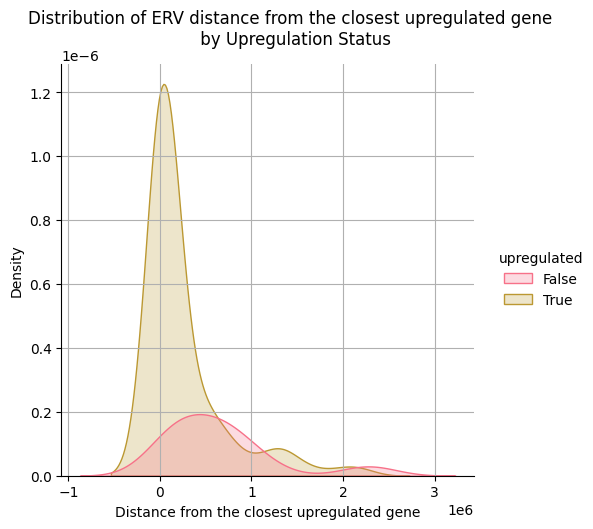

In [31]:
# Choose a color palette
custom_palette = sns.color_palette("husl")

# Plot
plot = sns.displot(merged_ervs, x="gene_dist", hue="upregulated", kind="kde", palette=custom_palette, fill=True, legend=True)

# Set axis labels and title
plot.set_axis_labels("Distance from the closest upregulated gene", "Density")
plot.fig.suptitle("Distribution of ERV distance from the closest upregulated gene \n by Upregulation Status", y=1.05)

# Adjust legend position
plot._legend.set_bbox_to_anchor((1, 0.5))

# Turn on gridlines
plt.grid(True)

# Save plot with higher quality and tight layout
plt.savefig('DNMT1_distr_erv_to_gene_dist.jpg', dpi=300, bbox_inches='tight')

# Show plot
plt.show()



In [32]:
#TRY TO FILTER OUT THOSE WITH ALMOST NO DIFFERENCE IN EXPRESSION 

In [33]:
rsem_m1 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/1_RNA-Seq_SRR12849888.genes.results', sep = '\t')
rsem_m2 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/2_RNA-Seq_SRR12849889.genes.results', sep = '\t')
rsem_m3 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/3_RNA-Seq_SRR12849891.genes.results', sep = '\t')
rsem_m4 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/4_RNA-Seq_SRR12849892.genes.results', sep = '\t')

In [34]:
#read in the overexpressed ERVs that we got form DESEQ2 
file = open('ERV_names.txt')

overexpressed_ERVs = file.read() 
overexpressed_ERVs_list = overexpressed_ERVs.split('\n')[:-1]

In [35]:
rsem_erv_1 = rsem_m1[rsem_m1['gene_id'].isin(overexpressed_ERVs_list)]
rsem_erv_2 = rsem_m2[rsem_m2['gene_id'].isin(overexpressed_ERVs_list)]
rsem_erv_3 = rsem_m3[rsem_m3['gene_id'].isin(overexpressed_ERVs_list)]
rsem_erv_4 = rsem_m4[rsem_m4['gene_id'].isin(overexpressed_ERVs_list)]


In [36]:
rsem_erv_1 = rsem_erv_1[['gene_id', 'TPM']]
rsem_erv_2 = rsem_erv_2[['gene_id', 'TPM']]
rsem_erv_3 = rsem_erv_3[['gene_id', 'TPM']]
rsem_erv_4 = rsem_erv_4[['gene_id', 'TPM']]

In [37]:
merged_cont = pd.merge(rsem_erv_1, rsem_erv_2, on = ['gene_id'], suffixes = ('_cont1', '_cont2'))
merged_mut = pd.merge(rsem_erv_3, rsem_erv_4, on = ['gene_id'], suffixes = ('_mut1', '_mut2'))

In [38]:
merged = pd.merge(merged_cont, merged_mut, on = ['gene_id'])
merged = merged[(merged['TPM_cont1'] > 10) | (merged['TPM_cont2'] > 10) | (merged['TPM_mut1'] > 10) | (merged['TPM_mut2'] > 10)]
ERV_to_subset = list(merged['gene_id'])

In [39]:
#merged_ervs_filtered = merged_ervs[merged_ervs['gene_id'].isin(ERV_to_subset)]


In [40]:
# Choose a color palette
#KDE _ PROBABILITY DENSITY CURVE - BOTH DISTRIBUTIONS SUM TO 1, SO WE CAN ACTUALLY COMPARE BETWEEN THEM

#custom_palette = sns.color_palette("husl")

# Plot
#plot = sns.displot(merged_ervs_filtered, x="gene_dist", hue="upregulated", palette=custom_palette, fill=True, legend=True, kind = "kde")
# Set axis labels and title
#plot.set_axis_labels("Distance from the closest upregulated gene", "Density")
#plot.fig.suptitle("Distribution of ERV distance from the closest upregulated gene by Upregulation Status (TPM > 10)", y=1.05)

# Adjust legend position
#plot._legend.set_bbox_to_anchor((1, 0.5))

# Turn on gridlines
#plt.grid(True)

# Save plot with higher quality and tight layout
#plt.savefig('distr_erv_to_gene_dist_TPM10.jpg', dpi=300, bbox_inches='tight')

# Show plot
#plt.show()


SEE IF THERE IS A HIGHER EXPRESSION OF GENES IN THESE AREAS 


In [41]:
#print(merged_ervs_filtered)

In [42]:
#print(genes_df)

In [43]:
merged = pd.merge(merged_cont, merged_mut, on = ['gene_id'])
merged = merged[(merged['TPM_cont1'] < 10) | (merged['TPM_cont2'] < 10) | (merged['TPM_mut1'] < 10) | (merged['TPM_mut2'] > 10)]
ERV_to_subset = list(merged['gene_id'])

In [44]:
merged_ervs_filtered_2 = merged_ervs[merged_ervs['gene_id'].isin(ERV_to_subset)]

/tmp/ipykernel_1510398/1405628912.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  plot = sns.displot(merged_ervs_filtered_2, x="gene_dist", hue="upregulated", palette=custom_palette, fill=True, legend=True, kind = "kde")


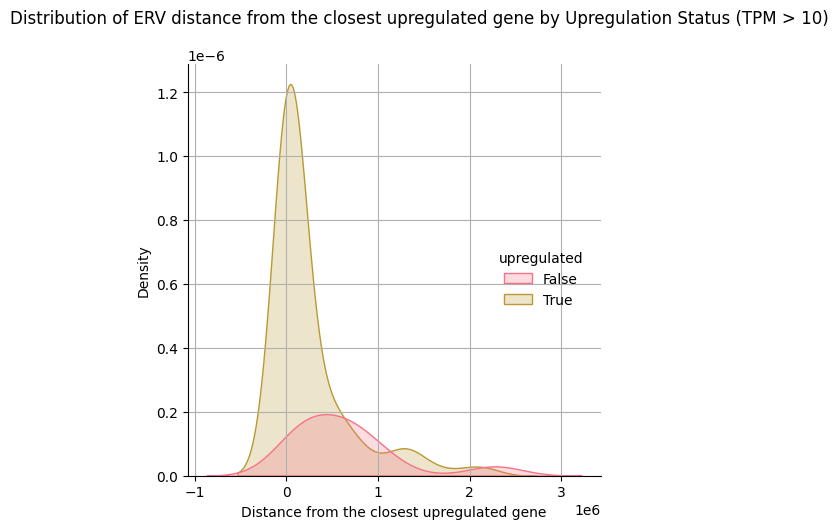

In [45]:
# Choose a color palette
#KDE _ PROBABILITY DENSITY CURVE - BOTH DISTRIBUTIONS SUM TO 1, SO WE CAN ACTUALLY COMPARE BETWEEN THEM

custom_palette = sns.color_palette("husl")

# Plot
plot = sns.displot(merged_ervs_filtered_2, x="gene_dist", hue="upregulated", palette=custom_palette, fill=True, legend=True, kind = "kde")
# Set axis labels and title
plot.set_axis_labels("Distance from the closest upregulated gene", "Density")
plot.fig.suptitle("Distribution of ERV distance from the closest upregulated gene by Upregulation Status (TPM > 10)", y=1.05)

# Adjust legend position
plot._legend.set_bbox_to_anchor((1, 0.5))

# Turn on gridlines
plt.grid(True)

# Save plot with higher quality and tight layout
plt.savefig('distr_erv_to_gene_dist_TPM10.jpg', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


In [46]:
import matplotlib.pyplot as plt
import numpy as np

def visualise_expression_regions(erv_df, gene_df, filename, threshold=True, split_by_chrom=False, subplots_per_row=3):
    # Group dataframes by chromosome
    chrom_groups_erv = erv_df.groupby('seqname')
    chrom_groups_gene = gene_df.groupby('seqname')
    num_chroms = len(chrom_groups_erv)

    # Iterate over each chromosome group
    for chrom, group_erv in chrom_groups_erv:
        # Sort the ERV group by ascending order of 'start' position
        group_erv = group_erv.sort_values(by='start')

        # Retrieve corresponding gene group
        group_gene = chrom_groups_gene.get_group(chrom).sort_values(by='start')

        # Calculate the number of required subplots
        num_subplots = min(len(group_erv), subplots_per_row)

        # Calculate the number of rows needed for subplots
        num_rows = int(np.ceil(len(group_erv) / subplots_per_row))

        # Initialize a new figure for each chromosome
        fig, ax = plt.subplots(num_rows, subplots_per_row, figsize=(15, 5*num_rows))

        # Flatten the axes array for easy iteration
        ax = ax.flatten()

        # Iterate over each ERV region
        for i, (_, row_erv) in enumerate(group_erv.iterrows()):
            # Filter genes within ±50 kb of the ERV region
            genes_within_range = group_gene[(group_gene['start'] >= row_erv['start'] - 50000) &
                                             (group_gene['end'] <= row_erv['end'] + 50000)]

            # Plot ERV region and genes within ±50 kb on the same plot
            ax[i].plot([row_erv['start'], row_erv['end']], [1, 1], linewidth=5, label='ERV Region')

            for _, row_gene in genes_within_range.iterrows():
                ax[i].plot([row_gene['start'], row_gene['end']], [0, 0], linewidth=5, label='Gene Region')

            # Set title and labels for each subplot
            ax[i].set_title(f'Chromosome {chrom} - ERV Region {i+1}')
            ax[i].set_xlabel('Genomic Position')
            ax[i].set_ylabel('Regions')
            ax[i].legend()

        # Hide empty subplots if there are any
        for j in range(len(group_erv), num_rows*subplots_per_row):
            ax[j].axis('off')

        # Save figure for each chromosome
        fig.savefig(f"{filename}_chrom_{chrom}.png")

# Example usage:
# visualise_expression_regions(erv_df, gene_df, "expression_regions", split_by_chrom=True)


In [47]:
#visualise_expression_regions(merged_ervs_filtered, genes_df, 'ERV_genes_regions', split_by_chrom=True, subplots_per_row=3)

In [48]:
upregulated_ervs = merged_ervs_filtered[merged_ervs_filtered['upregulated'] == True]

NameError: name 'merged_ervs_filtered' is not defined

In [ ]:
#visualise_expression_regions(upregulated_ervs, genes_df, 'ERV_genes_regions', split_by_chrom=True, subplots_per_row=3)

In [ ]:
downregulated_ervs = merged_ervs_filtered[merged_ervs_filtered['upregulated'] == False]
#print(downregulated_ervs)

#downregulated_ervs = merged_ervs[merged_ervs['upregulated'] == False]
print(downregulated_ervs)

In [ ]:
#visualise_expression_regions(downregulated_ervs, genes_df, 'ERV_genes_regions', split_by_chrom=True, subplots_per_row=3)

In [ ]:
print(len(upregulated_ervs))
print(len(downregulated_ervs))

In [ ]:
def count_gene_around_erv(erv_df, gene_df, threshold_distance):
    gene_around_erv_count = 0
    no_gene_around_erv_count = 0

    # Iterate over each ERV region
    for _, row_erv in erv_df.iterrows():
        # Find genes within ±50 kb of the ERV region
        genes_within_range = gene_df[(gene_df['start'] >= abs(row_erv['start'] - threshold_distance)) &
                                      (gene_df['end'] <= abs(row_erv['end'] + threshold_distance))]
        # If genes are found, increment the count
        if not genes_within_range.empty:
            gene_around_erv_count += 1
        else:
            no_gene_around_erv_count += 1
    print('gene_around_erv_count: ', gene_around_erv_count)
    print('no_gene_around_erv_count: ', no_gene_around_erv_count)
    return gene_around_erv_count, no_gene_around_erv_count

# Example usage:
# gene_around_erv_count, no_gene_around_erv_count = count_gene_around_erv(erv_df, gene_df)
# print("Number of ERVs with genes around:", gene_around_erv_count)
# print("Number of ERVs without genes around:", no_gene_around_erv_count)


In [ ]:
#drop erv from row 17
upregulated_ervs = merged_ervs_filtered[merged_ervs_filtered['upregulated'] == True]
downregulated_ervs = merged_ervs_filtered[merged_ervs_filtered['upregulated'] == False]

print(merged_ervs_filtered)

In [ ]:
#LOWLY EXPRESED FILTERED - HIGH EXPRESSION ERV's ONLY
x,y = count_gene_around_erv(upregulated_ervs, genes_df, 30000)

m,n = count_gene_around_erv(downregulated_ervs, genes_df, 30000)


In [ ]:
#ALL ERV'S REGARDLESS OF THEIR EXPRESSION LEVELS
upregulated_ervs = merged_ervs[merged_ervs['upregulated'] == True]
downregulated_ervs = merged_ervs[merged_ervs['upregulated'] == False]

In [ ]:
#print(len(upregulated_ervs))
#print(len(downregulated_ervs))

In [ ]:
#THRESHOLD 30kb, no filtering
x,y = count_gene_around_erv(upregulated_ervs, genes_df, 30000) #50 as a base

m,n = count_gene_around_erv(downregulated_ervs, genes_df, 30000)

#fisher's test performed in 

In [ ]:
#change distance to 100000

In [ ]:
downregulated_ervs = merged_ervs_filtered[merged_ervs_filtered['upregulated'] == False]
upregulated_ervs = merged_ervs_filtered[merged_ervs_filtered['upregulated'] == True]

In [ ]:
x,y = count_gene_around_erv(upregulated_ervs, genes_df, 30000)

m,n = count_gene_around_erv(downregulated_ervs, genes_df, 30000)

In [ ]:
#TRY TO SEE THAT ONLY FOR LOW EXPRESSION ERV's - I THINK THESE MAY BE MORE DEPENDENT ON THE 
#REGIONS AND THEY MAY BE A SIDE PRODUCT OF A GENERAL HIGH EXPRESSION REGIONS
merged = pd.merge(merged_cont, merged_mut, on = ['gene_id'])
merged = merged[(merged['TPM_cont1'] < 10) & (merged['TPM_cont2'] < 10) & (merged['TPM_mut1'] < 10) & (merged['TPM_mut2'] < 10)]
ERV_to_subset = list(merged['gene_id'])
low_expr_ervs = merged_ervs[merged_ervs['gene_id'].isin(ERV_to_subset)]

In [ ]:
#print(ERV_to_subset)

In [ ]:
downregulated_ervs = low_expr_ervs[low_expr_ervs['upregulated'] == False]
upregulated_ervs = low_expr_ervs[low_expr_ervs['upregulated'] == True]

In [ ]:
x,y = count_gene_around_erv(upregulated_ervs, genes_df, 30000)

m,n = count_gene_around_erv(downregulated_ervs, genes_df, 30000)

TRY TO SEE IF THERE ARE ANY PATTERNS WITHIN FAMILIES

In [62]:
#load the ERV family data

In [63]:
family_df = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/families/Hsap38.txt',sep = '\t', on_bad_lines='skip')

In [64]:
print(family_df)

                                    ID chr     start       end strand  \
0            Hsap38.chr1.74855.76774.+   1     74855     76774      +   
1          Hsap38.chr1.884947.885237.-   1    884947    885237      -   
2          Hsap38.chr1.895601.896266.-   1    895601    896266      -   
3          Hsap38.chr1.896537.897049.-   1    896537    897049      -   
4          Hsap38.chr1.897053.897436.-   1    897053    897436      -   
...                                ...  ..       ...       ...    ...   
33961  Hsap38.chrY.57161286.57162035.-   Y  57161286  57162035      -   
33962  Hsap38.chrY.57161969.57162262.-   Y  57161969  57162262      -   
33963  Hsap38.chrY.57162377.57162853.-   Y  57162377  57162853      -   
33964  Hsap38.chrY.57171031.57171489.-   Y  57171031  57171489      -   
33965  Hsap38.chrY.57175324.57175737.-   Y  57175324  57175737      -   

       AA_length  method  N_cnt                              MetID  \
0            640       6      0        Hsap38.chr1.74

In [65]:
#will use the Repbase as a family ID 
family_id = family_df[['ID', 'Repbase']]


In [3]:
#get the diff expr ervs and check their family
ervs = ervs.rename(columns={'gene_id':'ID'})
ervs_family = pd.merge(ervs, family_id, on='ID')

NameError: name 'ervs' is not defined

In [4]:
ervs_overexpressed = ervs[ervs['log2foldchange'] > 0]
print(len(ervs_overexpressed))
ervs_family = pd.merge(ervs_overexpressed, family_id, on='ID')
ervs_family = pd.merge(ervs, family_id, on='ID')

NameError: name 'ervs' is not defined

In [2]:
grouped_df = ervs_family.groupby('Repbase') 
for name, group in grouped_df:
    print(f"Family: {name}")
    print(group)
    print(f"Number of entries: {len(group)}\n")

NameError: name 'ervs_family' is not defined

In [69]:
filtered_groups = {name: group for name, group in grouped_df if len(group) > 1}

filtered_df = pd.concat(filtered_groups.values())

# Optionally, create a summary DataFrame for these groups
summary_df = pd.DataFrame({
    'Repbase': list(filtered_groups.keys()),
    'Counts': [len(group) for group in filtered_groups.values()]
})
#print(summary_df)

In [70]:
merged = pd.merge(merged_cont, merged_mut, on = ['gene_id'])
merged = merged[(merged['TPM_cont1'] > 10) | (merged['TPM_cont2'] > 10) | (merged['TPM_mut1'] > 10) | (merged['TPM_mut2'] > 10)]
ervs_list = list(merged['gene_id'])
ervs_overexpressed = list(ervs_overexpressed['ID'])

In [71]:
# Convert lists to sets
ervs_set = set(ervs_list)
overexpressed_set = set(ervs_overexpressed)

# Find the intersection of the two sets
intersection_set = ervs_set.intersection(overexpressed_set)

# Convert the intersection set back to a list
intersection_list = list(intersection_set)

# Print the intersection list


In [72]:
#asign a group to the overexpressed ERVs
gene_to_group = filtered_df.set_index('ID')['Repbase'].to_dict()

In [73]:
#HIGHLY OVEREXPRESSED 
ervs_group = {gene_id: gene_to_group.get(gene_id, 'Unknown') for gene_id in ervs_list}
for gene_id, group in ervs_group.items():
    print(f"Gene ID: {gene_id}, Group: {group}")
print(len(ervs_group))

ervs_group2 = {gene_id: gene_to_group.get(gene_id, 'Unknown') for gene_id in intersection_list}
for gene_id, group in ervs_group2.items():
    print(f"Gene ID: {gene_id}, Group: {group}")
print(len(ervs_group2))

Gene ID: Hsap38.chr1.175103294.175103704.-, Group: HERV9NC-int|LTR/ERV1
Gene ID: Hsap38.chr1.175103876.175104337.-, Group: HERV9NC-int|LTR/ERV1
Gene ID: Hsap38.chr1.175104392.175105102.-, Group: HERV9NC-int|LTR/ERV1
Gene ID: Hsap38.chr1.221968992.221969252.+, Group: HERVH-int|LTR/ERV1
Gene ID: Hsap38.chr1.68389168.68389551.+, Group: HERVH-int|LTR/ERV1
Gene ID: Hsap38.chr13.109267871.109268239.+, Group: HERVH-int|LTR/ERV1
Gene ID: Hsap38.chr13.109268243.109268650.+, Group: HERVH-int|LTR/ERV1
Gene ID: Hsap38.chr13.109268675.109268986.+, Group: HERVH-int|LTR/ERV1
Gene ID: Hsap38.chr17.76608803.76609162.-, Group: HERVH-int|LTR/ERV1
Gene ID: Hsap38.chr21.8999863.9000333.+, Group: Unknown
Gene ID: Hsap38.chr3.128963729.128963980.+, Group: HERVH-int|LTR/ERV1
Gene ID: Hsap38.chr3.146366733.146366975.+, Group: HERVH-int|LTR/ERV1
Gene ID: Hsap38.chr5.1579643.1580821.-, Group: Unknown
Gene ID: Hsap38.chr5.1581914.1582819.-, Group: Unknown
Gene ID: Hsap38.chr5.1582941.1583480.-, Group: Unknown
Gen

In [74]:
unique_groups = set(ervs_group.values())
group_counts = {group: 0 for group in unique_groups}

# Count the number of unique groups
num_unique_groups = len(unique_groups)

# Print the number of unique groups
print(f"Number of unique groups: {num_unique_groups}")

for group in ervs_group.values():
    if group != 'Unknown':
        group_counts[group] += 1

for group, count in group_counts.items():
    print(f"Group: {group}, ERVs count: {count}")


#ONLY OVEREXPRESSED

unique_groups = set(ervs_group2.values())
group_counts = {group: 0 for group in unique_groups}

# Count the number of unique groups
num_unique_groups = len(unique_groups)

# Print the number of unique groups
print(f"Number of unique groups: {num_unique_groups}")

for group in ervs_group2.values():
    if group != 'Unknown':
        group_counts[group] += 1

for group, count in group_counts.items():
    print(f"Group: {group}, ERVs count: {count}")

Number of unique groups: 4
Group: HERVH-int|LTR/ERV1, ERVs count: 8
Group: HERV9NC-int|LTR/ERV1, ERVs count: 3
Group: Unknown, ERVs count: 0
Group: HERVIP10FH-int|LTR/ERV1, ERVs count: 1
Number of unique groups: 4
Group: HERVIP10FH-int|LTR/ERV1, ERVs count: 1
Group: HERVH-int|LTR/ERV1, ERVs count: 8
Group: Unknown, ERVs count: 0
Group: HERV9NC-int|LTR/ERV1, ERVs count: 3


In [75]:
#nr of overexpressed ERVs belonging to LTR ERV 1 fam 
herv_h_int_total = 26
herv_h_int_over = 8
erv_over_total = 20 
erv_total = 136

pval = 0.11

herv_k_int_total = 9
herv_k_int_over = 4
erv_over_total = 20 
erv_total = 136
pval = 0.09 

#ONLY LOOKING AT OVEREXPRESSED HERVH-int|LTR/ERV1
herv_k_int_total = 24   #number of ervs in this group 
herv_k_int_over = 8 #number of ervs in this group that are overexpressed
erv_over_total = 12 #total number of overexpressed ervs 
erv_total = 102 #total nr of overexpressed ervs
pval =  0.04



#CONCLUSIONS
8/12 highly overexpressed genes belong to HERVH-int|LTR/ERV1 (pval = 0.04) its also the biggest fam in my data so there doesn't need to be any corelation

No corelation between the family and the fact whether the ERV is over or underexpressed- much more dependent of location 




EXTRACT PROMOTER SEQUENCES AND RUN MEME ANALYSIS

In [76]:
ervs_of_int = intersection_list
print(ervs_of_int)
chromosomes = {'3': '/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/chom_seq/chr3.fa',
               '1': '/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/chom_seq/chr1.fa',
               '13': '/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/chom_seq/chr13.fa',
               'X': '/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/chom_seq/chrX.fa',
               '7': '/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/chom_seq/chr7.fa',
               '17': '/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/chom_seq/chr3.fa'
              }



['Hsap38.chr1.221968992.221969252.+', 'Hsap38.chr1.175103876.175104337.-', 'Hsap38.chr3.146366733.146366975.+', 'Hsap38.chr1.68389168.68389551.+', 'Hsap38.chrX.37483703.37484035.+', 'Hsap38.chr13.109268675.109268986.+', 'Hsap38.chr7.93807148.93807543.+', 'Hsap38.chr3.128963729.128963980.+', 'Hsap38.chr13.109268243.109268650.+', 'Hsap38.chr13.109267871.109268239.+', 'Hsap38.chr1.175104392.175105102.-', 'Hsap38.chr1.175103294.175103704.-', 'Hsap38.chr17.76608803.76609162.-']


In [77]:
def extract_chrom(name, animal):
    pattern = r"^{}\.chr([^.]+)\.".format(animal)
    match = re.search(pattern, name)
    if match:
        chrom = match.group(1)
        return chrom
    else:
        return None  # Return None if no match is found

def extract_start_pos(name, animal):
    pattern = r"^{}\.[^.]+\.([^.]+)\.".format(animal)
    match = re.search(pattern, name)
    if match:
        start_pos = int(match.group(1))
        return start_pos
    else:
        return None  # Return None if no match is found

def extract_end_pos(name, animal):
    pattern = r"^{}\.[^.]+\.[^.]+\.([^.]+)\.".format(animal)
    match = re.search(pattern, name)
    if match:
        end_pos = int(match.group(1))
        return end_pos
    else:
        return None  # Return None if no match is found

def extract_sequence(fasta_file, start, end):
    sequence = ""
    with open(fasta_file, "r") as f:
        # Skip header lines starting with '>'
        for line in f:
            if line.startswith(">"):
                continue
            # Concatenate sequence lines
            sequence += line.strip()
    # Find the sequence based on the provided coordinates
    sequence = sequence[(start - 1):end]
    return sequence
    

ERVS of int = 

In [78]:
promotor_seqs = {}
for erv in ervs_of_int:
    chrom = extract_chrom(erv, 'Hsap38')
    chrom_file = chromosomes[chrom]
    start = extract_start_pos(erv, 'Hsap38')
    end = extract_end_pos(erv, 'Hsap38')
    #seq = extract_sequence(chrom_file, start - 30000, end + 30000)
    #modify to only save the bp around not in the actual ERV
    seq2 = extract_sequence(chrom_file, start - 30000, start)
    seq3 = extract_sequence(chrom_file, end, end + 30000)
    

    #promotor_seqs[erv] = seq
    promotor_seqs[erv] = seq2 + seq3

#print(promotor_seqs)

    

In [79]:
def save_sequences_to_fasta(promoter_dict):
    # Create a list to store all sequences
    all_sequences = []

    for key, sequence in promoter_dict.items():
        # Create a filename with .fa extension for each sequence
        filename = f"/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/promoter_seqs/{key}.fa"
        # Write sequence to a separate FASTA file
        with open(filename, 'w') as out_file:
            out_file.write(f">{key}\n{sequence}\n")
        
        # Append the sequence to the list of all sequences
        all_sequences.append(f">{key}\n{sequence}\n")
    
    # Write all sequences to a single merged FASTA file
    merged_filename = "/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/promoter_seqs/sin_ervs_all_sequences.fa"
    with open(merged_filename, 'w') as merged_file:
        merged_file.write("".join(all_sequences))

In [80]:
save_sequences_to_fasta(promotor_seqs)

NZM

In [3]:
columns = ['gene_id', 'log2foldchange'] 
genes = pd.read_csv('NZM_genes_diff_expr.tsv', sep = '\t', names = columns)
ervs = pd.read_csv('NZM_ERV_diff_expr.tsv', sep = '\t', names = columns)

In [4]:
columns = ['seqname', 'source', 'feature', 'start', 'end', 'score','strand','frame', 'attribute']

ensembl_gtf = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/reference/GRCh38-104/ensembl+geve/GRCh38-104.with_geve_v1.gtf', sep = '\t', skiprows = 5, dtype = {0:'str', 7:'str'}, names = columns ) #tego typu 7 nie jestem pewna

In [5]:
def get_gene_id(df):
    df = df.copy()
    pattern = r'gene_id "(.*?)"'
    df['gene_id'] = df['attribute'].str.extract(pattern)
    return df 

In [6]:
ensembl_gtf = get_gene_id(ensembl_gtf)

In [7]:
merged_genes = pd.merge(ensembl_gtf, genes, on = ['gene_id'])
merged_ervs = pd.merge(ensembl_gtf, ervs, on = ['gene_id'])

In [8]:
merged_genes = merged_genes[merged_genes['feature'] == 'gene']
merged_ervs = merged_ervs[merged_ervs['feature'] == 'transcript']
genes_df = merged_genes[['seqname', 'start', 'end', 'gene_id', 'log2foldchange']]

In [9]:
#add info about whether the gene is up or downregulated and only keep the up regulated ones
genes_df['log2foldchange'] = genes_df['log2foldchange'].astype(float)
genes_df.loc[:, 'upregulated'] = genes_df['log2foldchange'] > 0
#genes_df = genes_df[genes_df['upregulated'] == True ]
genes_df = genes_df[genes_df['upregulated'] != True ]

/tmp/ipykernel_1870628/3733781480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genes_df['log2foldchange'] = genes_df['log2foldchange'].astype(float)
/tmp/ipykernel_1870628/3733781480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genes_df.loc[:, 'upregulated'] = genes_df['log2foldchange'] > 0


           seqname    start      end  log2foldchange  expr
0                1  1203508  1206592       -5.522503   -50
1                1  1203508  1206571       -5.522503   -50
2                1  1206385  1206571       -5.522503   -50
3                1  1206385  1206571       -5.522503   -50
4                1  1206569  1206571       -5.522503   -50
...            ...      ...      ...             ...   ...
111352  KI270734.1   138483   138667        5.816585    50
111353  KI270734.1   138480   138482        5.816585    50
111354  KI270734.1   161689   161750        5.816585    50
111355  KI270734.1   156447   156497        5.816585    50
111356  KI270734.1   138082   138479        5.816585    50

[111357 rows x 5 columns]


In [10]:
def closest_up_gene(row, genes_df):
    # Only look on the same chromosomes
    genes_df = genes_df[genes_df['seqname'] == row['seqname']]
    if genes_df.empty:
        print('No overexpressed genes on this chromosome! ', row['seqname'])
        return 0 
    else:
        # Calculate min distances to start and end of the gene
        genes_df['distance_to_start'] = np.minimum(abs(row['start'] - genes_df['start']), abs(row['end'] - genes_df['start']))
        genes_df['distance_to_end'] = np.minimum(abs(row['start'] - genes_df['end']), abs(row['end'] - genes_df['end']))
        
        min_distance_to_start = genes_df['distance_to_start'].min()
        min_distance_to_end = genes_df['distance_to_end'].min()
        
        min_distance = min(min_distance_to_start, min_distance_to_end)
        return min_distance


In [12]:
merged_ervs['gene_dist'] = merged_ervs.apply(closest_up_gene, args=(genes_df,), axis=1)

In [13]:
#add info whether the gene is up or down regulated:
merged_ervs['log2foldchange'] = merged_ervs['log2foldchange'].astype(float)
merged_ervs.loc[:, 'upregulated'] = merged_ervs['log2foldchange'] > 0

/tmp/ipykernel_1870628/3356689240.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  plot = sns.displot(merged_ervs, x="gene_dist", hue="upregulated", kind="kde", palette=custom_palette, fill=True, legend=True)


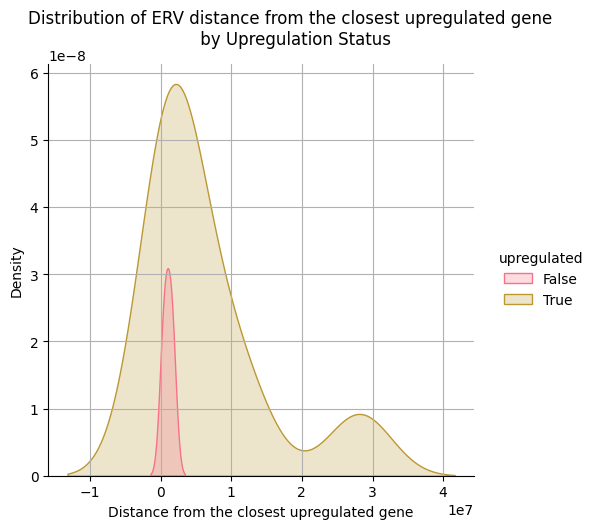

In [14]:
# Choose a color palette
custom_palette = sns.color_palette("husl")

# Plot
plot = sns.displot(merged_ervs, x="gene_dist", hue="upregulated", kind="kde", palette=custom_palette, fill=True, legend=True)

# Set axis labels and title
plot.set_axis_labels("Distance from the closest upregulated gene", "Density")
plot.fig.suptitle("Distribution of ERV distance from the closest upregulated gene \n by Upregulation Status", y=1.05)

# Adjust legend position
plot._legend.set_bbox_to_anchor((1, 0.5))

# Turn on gridlines
plt.grid(True)

# Save plot with higher quality and tight layout
plt.savefig('NZM_distr_erv_to_gene_dist.jpg', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


/tmp/ipykernel_1451510/3044542442.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  plot = sns.displot(


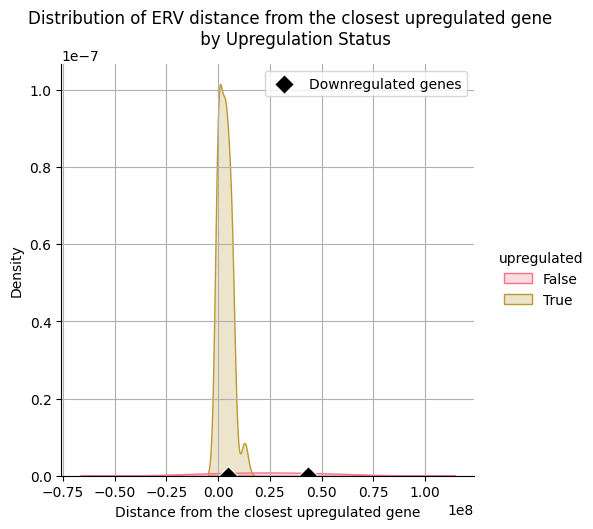

In [38]:

# Choose a color palette
custom_palette = sns.color_palette("husl")

# Plot KDE
plot = sns.displot(
    merged_ervs, 
    x="gene_dist", 
    hue="upregulated", 
    kind="kde", 
    palette=custom_palette, 
    fill=True, 
    legend=True
)

# Add points for downregulated genes
downregulated_data = merged_ervs[merged_ervs['upregulated']== False]
sns.scatterplot(
    data=downregulated_data, 
    x="gene_dist", 
    y=[0] * len(downregulated_data),  # y-values at zero to place points on the x-axis
    color='black', 
    marker='D',  # Diamond marker
    s=100, 
    label='Downregulated genes', 
    ax=plot.ax
)

# Set axis labels and title
plot.set_axis_labels("Distance from the closest upregulated gene", "Density")
plot.fig.suptitle("Distribution of ERV distance from the closest upregulated gene \n by Upregulation Status", y=1.05)

# Adjust legend position
plot._legend.set_bbox_to_anchor((1, 0.5))

# Turn on gridlines
plot.ax.grid(True)

# Save plot with higher quality and tight layout
plt.savefig('NZM_distr_erv_to_gene_dist.jpg', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


/tmp/ipykernel_1451510/3805516079.py:16: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  plot = sns.displot(
/tmp/ipykernel_1451510/3805516079.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  plot = sns.displot(


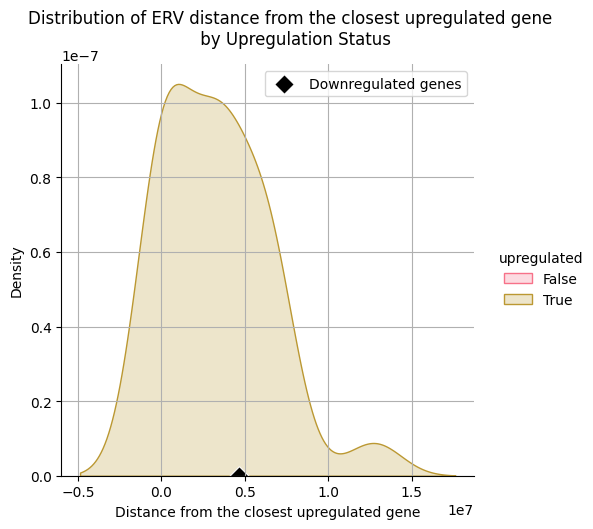

In [94]:
# Add upregulated column based on log2foldchange
merged_ervs['log2foldchange'] = merged_ervs['log2foldchange'].astype(float)
merged_ervs['upregulated'] = merged_ervs['log2foldchange'] > 0
merged_ervs['downregulated'] = merged_ervs['log2foldchange'] < 0

# Identify the row where upregulated = False and gene_dist has the highest value
idx_to_drop = merged_ervs.loc[merged_ervs['upregulated'] == False, 'gene_dist'].idxmax()

# Drop the identified row
merged_ervs = merged_ervs.drop(idx_to_drop).reset_index(drop=True)

# Choose a color palette
custom_palette = sns.color_palette("husl")

# Plot KDE
plot = sns.displot(
    merged_ervs, 
    x="gene_dist", 
    hue="upregulated", 
    kind="kde", 
    palette=custom_palette, 
    fill=True, 
    legend=True
)

# Add points for downregulated genes
downregulated_data = merged_ervs[merged_ervs['downregulated']]
sns.scatterplot(
    data=downregulated_data, 
    x="gene_dist", 
    y=[0] * len(downregulated_data),  # y-values at zero to place points on the x-axis
    color='black', 
    marker='D',  # Diamond marker
    s=100,  # Size of the marker
    label='Downregulated genes', 
    ax=plot.ax
)

# Set axis labels and title
plot.set_axis_labels("Distance from the closest upregulated gene", "Density")
plot.fig.suptitle("Distribution of ERV distance from the closest upregulated gene \n by Upregulation Status", y=1.05)

# Adjust legend position
plot._legend.set_bbox_to_anchor((1, 0.5))

# Turn on gridlines
plot.ax.grid(True)

# Save plot with higher quality and tight layout
plt.savefig('NZM_distr_erv_to_gene_dist.jpg', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


In [42]:
def count_gene_around_erv(erv_df, gene_df, threshold_distance):
    gene_around_erv_count = 0
    no_gene_around_erv_count = 0

    # Iterate over each ERV region
    for _, row_erv in erv_df.iterrows():
        # Find genes within ±50 kb of the ERV region
        genes_within_range = gene_df[(gene_df['start'] >= abs(row_erv['start'] - threshold_distance)) &
                                      (gene_df['end'] <= abs(row_erv['end'] + threshold_distance))]
        # If genes are found, increment the count
        if not genes_within_range.empty:
            gene_around_erv_count += 1
        else:
            no_gene_around_erv_count += 1
    print('gene_around_erv_count: ', gene_around_erv_count)
    print('no_gene_around_erv_count: ', no_gene_around_erv_count)
    return gene_around_erv_count, no_gene_around_erv_count

In [56]:
upregulated_ervs = merged_ervs[merged_ervs['upregulated'] == True]
downregulated_ervs = merged_ervs[merged_ervs['upregulated'] == False]

print(upregulated_ervs)

   seqname source     feature      start        end score strand frame  \
0       12   geve  transcript  127155087  127155659     .      +     0   
1       12   geve  transcript  127155953  127156498     .      +     0   
2       12   geve  transcript   65550104   65551864     .      -     0   
4       16   geve  transcript   35519171   35519536     .      +     0   
5       16   geve  transcript   35520304   35520693     .      +     0   
6       19   geve  transcript   20810822   20811718     .      +     0   
8       22   geve  transcript   18941587   18942399     .      +     0   
9       22   geve  transcript   18943304   18946927     .      +     0   
10       3   geve  transcript  113025711  113027561     .      -     0   
11       3   geve  transcript  148566333  148567736     .      -     0   
12       3   geve  transcript  185564943  185567849     .      -     0   
13       3   geve  transcript  185567813  185570923     .      -     0   
14       4   geve  transcript   537256

In [55]:
#DOESNT GIVE ANY INTERESTING INSIGHTS

#x,y = count_gene_around_erv(upregulated_ervs, genes_df, 30000)

#m,n = count_gene_around_erv(downregulated_ervs, genes_df, 30000)

x,y = count_gene_around_erv(upregulated_ervs, genes_df, 30000)

gene_around_erv_count:  4
no_gene_around_erv_count:  23
gene_around_erv_count:  0
no_gene_around_erv_count:  2


In [58]:
rsem_s1 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/NZM/1_RNA-Seq_SRR12121871.genes.results', sep = '\t')
rsem_s2 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/NZM/2_RNA-Seq_SRR12121872.genes.results', sep = '\t')
rsem_s3 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/NZM/3_RNA-Seq_SRR12121873.genes.results', sep = '\t')
rsem_s4 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/NZM/4_RNA-Seq_SRR12121874.genes.results', sep = '\t')
rsem_s5 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/NZM/5_RNA-Seq_SRR12121875.genes.results', sep = '\t')
rsem_s6 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/NZM/6_RNA-Seq_SRR12121876.genes.results', sep = '\t')
rsem_s7 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/NZM/7_RNA-Seq_SRR12121877.genes.results', sep = '\t')
rsem_s8 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/NZM/8_RNA-Seq_SRR12121878.genes.results', sep = '\t')
rsem_s9 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/NZM/9_RNA-Seq_SRR12121879.genes.results', sep = '\t')

In [59]:
#read in the overexpressed ERVs that we got form DESEQ2 
file = open('NZM_ERV_names.txt')

overexpressed_ERVs = file.read() 
overexpressed_ERVs_list = overexpressed_ERVs.split('\n')[:-1]

In [60]:
rsem_erv_1 = rsem_s1[rsem_s1['gene_id'].isin(overexpressed_ERVs_list)]
rsem_erv_2 = rsem_s2[rsem_s2['gene_id'].isin(overexpressed_ERVs_list)]
rsem_erv_3 = rsem_s3[rsem_s3['gene_id'].isin(overexpressed_ERVs_list)]
rsem_erv_4 = rsem_s4[rsem_s4['gene_id'].isin(overexpressed_ERVs_list)]
rsem_erv_5 = rsem_s5[rsem_s5['gene_id'].isin(overexpressed_ERVs_list)]
rsem_erv_6 = rsem_s6[rsem_s6['gene_id'].isin(overexpressed_ERVs_list)]
rsem_erv_7 = rsem_s7[rsem_s7['gene_id'].isin(overexpressed_ERVs_list)]
rsem_erv_8 = rsem_s8[rsem_s8['gene_id'].isin(overexpressed_ERVs_list)]
rsem_erv_9 = rsem_s9[rsem_s9['gene_id'].isin(overexpressed_ERVs_list)]

In [61]:
rsem_erv_1 = rsem_erv_1[['gene_id', 'TPM']]
rsem_erv_2 = rsem_erv_2[['gene_id', 'TPM']]
rsem_erv_3 = rsem_erv_3[['gene_id', 'TPM']]
rsem_erv_4 = rsem_erv_4[['gene_id', 'TPM']]
rsem_erv_5 = rsem_erv_4[['gene_id', 'TPM']]
rsem_erv_6 = rsem_erv_4[['gene_id', 'TPM']]
rsem_erv_7 = rsem_erv_4[['gene_id', 'TPM']]
rsem_erv_8 = rsem_erv_4[['gene_id', 'TPM']]
rsem_erv_9 = rsem_erv_4[['gene_id', 'TPM']]

In [62]:
inv1_merged = pd.merge(rsem_erv_1, rsem_erv_2, on = ['gene_id'], suffixes = ['_inv1', '_inv2'])
inv2_merged = pd.merge(rsem_erv_3, rsem_erv_6, on = ['gene_id'], suffixes = ['_inv3', '_inv4'])
inv3_merged = pd.merge(inv2_merged, rsem_erv_7, on = ['gene_id'])
inv_full = pd.merge(inv3_merged, inv1_merged, on = ['gene_id'])

ninv1_merged = pd.merge(rsem_erv_4, rsem_erv_5, on = ['gene_id'], suffixes = ['_ninv1', '_ninv2'])
ninv2_merged = pd.merge(rsem_erv_8, rsem_erv_9, on = ['gene_id'], suffixes = ['_ninv3', '_ninv4'])
ninv_full = pd.merge(ninv2_merged, ninv1_merged, on = ['gene_id'])




Index(['gene_id', 'TPM_inv3', 'TPM_inv4', 'TPM', 'TPM_inv1', 'TPM_inv2',
       'TPM_ninv3', 'TPM_ninv4', 'TPM_ninv1', 'TPM_ninv2'],
      dtype='object')


In [67]:
merged = pd.merge(inv_full, ninv_full, on = ['gene_id'])
merged = merged[(merged['TPM_inv1'] < 10) & (merged['TPM_inv2'] < 10) & (merged['TPM_inv3'] < 10) &
(merged['TPM_inv4'] < 10) & (merged['TPM'] < 10) & (merged['TPM_ninv1'] < 10) &
(merged['TPM_ninv2'] < 10) & (merged['TPM_ninv3'] < 10) & (merged['TPM_ninv4'] < 10)]
ERV_to_subset = list(merged['gene_id'])

In [71]:
low_expr_ervs = merged_ervs[merged_ervs['gene_id'].isin(ERV_to_subset)]

In [72]:
downregulated_ervs = low_expr_ervs[low_expr_ervs['upregulated'] == False]
upregulated_ervs = low_expr_ervs[low_expr_ervs['upregulated'] == True]

In [73]:
x,y = count_gene_around_erv(upregulated_ervs, genes_df, 30000)

m,n = count_gene_around_erv(downregulated_ervs, genes_df, 30000)

gene_around_erv_count:  2
no_gene_around_erv_count:  17
gene_around_erv_count:  0
no_gene_around_erv_count:  2


In [50]:
#LOOK FOR FAMILY PATTERNS
family_df = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/families/Hsap38.txt',sep = '\t', on_bad_lines='skip')

In [51]:
family_id = family_df[['ID', 'Repbase']]

In [52]:
ervs = ervs.rename(columns={'gene_id':'ID'})
ervs_family = pd.merge(ervs, family_id, on='ID')

In [53]:
ervs = ervs.drop(0).reset_index(drop=True)
ervs['log2foldchange'] = ervs['log2foldchange'].astype(float)

ervs_overexpressed = ervs[ervs['log2foldchange'] > 0]
print(len(ervs_overexpressed))
ervs_family = pd.merge(ervs_overexpressed, family_id, on='ID')
ervs_family = pd.merge(ervs, family_id, on='ID')

101


In [54]:
grouped_df = ervs_family.groupby('Repbase') 
for name, group in grouped_df:
    print(f"Family: {name}")
    print(group)
    print(f"Number of entries: {len(group)}\n")

Family: HERV-Fc1-int|LTR/ERV1
                                    ID  log2foldchange                Repbase
116  Hsap38.chr7.153409531.153411195.-        6.246998  HERV-Fc1-int|LTR/ERV1
Number of entries: 1

Family: HERV-Fc2-int|LTR/ERV1
                                ID  log2foldchange                Repbase
16  Hsap38.chr11.5929159.5930445.+        5.817444  HERV-Fc2-int|LTR/ERV1
17  Hsap38.chr11.5930950.5932023.+        7.065095  HERV-Fc2-int|LTR/ERV1
18  Hsap38.chr11.5932027.5932776.+        6.588774  HERV-Fc2-int|LTR/ERV1
Number of entries: 3

Family: HERV-Fc2-int|LTR/ERV1 L2b|LINE/L2
                                ID  log2foldchange  \
19  Hsap38.chr11.5932780.5933793.+        8.093696   

                              Repbase  
19  HERV-Fc2-int|LTR/ERV1 L2b|LINE/L2  
Number of entries: 1

Family: HERV16-int|LTR/ERVL L1P1|LINE/L1
                                  ID  log2foldchange  \
42  Hsap38.chr15.20374063.20374596.-        5.353554   

                             Repbase 

In [84]:
filtered_groups = {name: group for name, group in grouped_df if len(group) > 1}

filtered_df = pd.concat(filtered_groups.values())

# Optionally, create a summary DataFrame for these groups
summary_df = pd.DataFrame({
    'Repbase': list(filtered_groups.keys()),
    'Counts': [len(group) for group in filtered_groups.values()]
})
print(summary_df)

                                             Repbase  Counts
0                                 HERVH-int|LTR/ERV1       3
1                                 HERVK-int|LTR/ERVK       9
2                HERVK-int|LTR/ERVK LTR5_Hs|LTR/ERVK       3
3                                HERVK3-int|LTR/ERVK       2
4                                      L1PA3|LINE/L1       5
5  LTR5_Hs|LTR/ERVK SVA_F|Retroposon/SVA HERVK-in...       3


In [90]:
#COS TU ZLE
merged = pd.merge(inv_full, ninv_full, on = ['gene_id'])
merged = merged[(merged['TPM_inv1'] > 10) & (merged['TPM_inv2'] > 10) & (merged['TPM_inv3'] > 10) &
(merged['TPM_inv4'] > 10) & (merged['TPM'] > 10) & (merged['TPM_ninv1'] > 10) &
(merged['TPM_ninv2'] > 10) & (merged['TPM_ninv3'] > 10) & (merged['TPM_ninv4'] > 10)]
ervs_list = list(merged['gene_id'])

In [91]:
# Convert lists to sets
ervs_set = set(ervs_list)
overexpressed_set = set(ervs_overexpressed)

# Find the intersection of the two sets
intersection_set = ervs_set.intersection(overexpressed_set)

# Convert the intersection set back to a list
intersection_list = list(intersection_set)

In [92]:
#asign a group to the overexpressed ERVs
gene_to_group = filtered_df.set_index('ID')['Repbase'].to_dict()

In [93]:
ervs_group = {gene_id: gene_to_group.get(gene_id, 'Unknown') for gene_id in ervs_list}
for gene_id, group in ervs_group.items():
    print(f"Gene ID: {gene_id}, Group: {group}")
print(len(ervs_group))

ervs_group2 = {gene_id: gene_to_group.get(gene_id, 'Unknown') for gene_id in intersection_list}
for gene_id, group in ervs_group2.items():
    print(f"Gene ID: {gene_id}, Group: {group}")
print(len(ervs_group2))

0
0


In [65]:
#names greater than promoters 
file = open('names_greater_than_30.tsv')

names_greater_than_50 = pd.read_csv(file, sep='\t', header=None)

# Convert the DataFrame to a list
diff_meth_prom_list = names_greater_than_50[0].tolist()

In [66]:
file = open('ERV_names.txt')

overexpressed = file.read() 
overexpressed_list = overexpressed.split('\n')[:-1]

In [70]:
print(diff_meth_prom_list)
diff_meth_prom_list.append('Hsap38.chrX.37483703.37484035.+')
print(overexpressed_list)
# Find the intersection of the two sets
intersection_set = set(diff_meth_prom_list).intersection(set(overexpressed_list))

# Convert the intersection set back to a list
intersection_list = list(intersection_set)
print(intersection_list)

['Hsap38.chr1.166003279.166003821.-', 'Hsap38.chr1.178315010.178318861.-', 'Hsap38.chr1.75479921.75481885.+', 'Hsap38.chr1.78218064.78219080.+', 'Hsap38.chr1.91248360.91249019.-', 'Hsap38.chr10.39368909.39369544.-', 'Hsap38.chr10.57488098.57488901.+', 'Hsap38.chr10.75560510.75561451.-', 'Hsap38.chr10.81431156.81431443.+', 'Hsap38.chr10.81559057.81559482.-', 'Hsap38.chr10.99262570.99262842.+', 'Hsap38.chr11.12036980.12037243.+', 'Hsap38.chr11.4748723.4748965.+', 'Hsap38.chr11.54787573.54789732.+', 'Hsap38.chr11.59305045.59305398.-', 'Hsap38.chr11.88864705.88864995.-', 'Hsap38.chr12.105683630.105683962.+', 'Hsap38.chr12.11148491.11148796.-', 'Hsap38.chr12.111908612.111908998.+', 'Hsap38.chr12.55601936.55602379.+', 'Hsap38.chr13.48869627.48869959.-', 'Hsap38.chr13.54693829.54694083.-', 'Hsap38.chr13.55635730.55636236.-', 'Hsap38.chr13.58130068.58130472.-', 'Hsap38.chr13.72629816.72630139.+', 'Hsap38.chr14.25460838.25461179.-', 'Hsap38.chr14.32464375.32465004.+', 'Hsap38.chr14.49065638.490